In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy as sp

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()


The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 160706 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [5]:
from pycaret.utils import enable_colab
enable_colab()


Colab mode enabled.


In [4]:
pip install pycaret

     |████████████████████████████████| 266kB 34.9MB/s 
     |████████████████████████████████| 276kB 39.9MB/s 
     |████████████████████████████████| 61kB 8.0MB/s 
     |████████████████████████████████| 14.2MB 262kB/s 
     |████████████████████████████████| 112kB 60.3MB/s 
     |████████████████████████████████| 81kB 11.1MB/s 
     |████████████████████████████████| 1.7MB 38.1MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 6.8MB 25.8MB/s 
     |████████████████████████████████| 256kB 58.0MB/s 
     |████████████████████████████████| 174kB 52.0MB/s 
     |████████████████████████████████| 1.4MB 40.0MB/s 
     |████████████████████████████████| 2.0MB 35.7MB/s 
     |████████████████████████████████| 174kB 53.6MB/s 
     |████████████████████████████████| 81kB 9.7MB/s 
     |████████████████████████████████| 61kB 7.5MB/s

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
repit=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/태블로공유폴더/작업/아파트 상세정보   실거래가 데이터/반복매매지수.csv')
repit

FileNotFoundError: ignored

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/태블로공유폴더/작업/아파트 상세정보   실거래가 데이터/세종시_아파트_데이터.csv')
df.head()


,단지명,시군구,난방방식,연면적,동수,복도유형,주거전용면적,일반관리인원,경비관리인원,청소관리인원,연간소독횟수,CCTV개수,수전용량,승강기대수,주차관제,버스정류장거리,지하철거리,총세대수,용적률,건폐율,저층,고층,건설사,전용면적,층,건축년도,계약년월,주차대수,세대당주차대수,거래금액
0,수루배마을1단지,세종특별자치시 반곡동,0,206412.34,17,0,104167.151,9,6,17,3,650,4000.0,39,1,2,0,1111,181,20,9,29,"신동아건설(주),롯데건설(주)",96.788,5,2019,201907,1825,1.64,52000
1,수루배마을1단지,세종특별자치시 반곡동,0,206412.34,17,0,104167.151,9,6,17,3,650,4000.0,39,1,2,0,1111,181,20,9,29,"신동아건설(주),롯데건설(주)",84.454,2,2019,201909,1825,1.64,44325
2,수루배마을1단지,세종특별자치시 반곡동,0,206412.34,17,0,104167.151,9,6,17,3,650,4000.0,39,1,2,0,1111,181,20,9,29,"신동아건설(주),롯데건설(주)",84.454,6,2019,201911,1825,1.64,54800
3,수루배마을1단지,세종특별자치시 반곡동,0,206412.34,17,0,104167.151,9,6,17,3,650,4000.0,39,1,2,0,1111,181,20,9,29,"신동아건설(주),롯데건설(주)",84.454,3,2019,201911,1825,1.64,45568
4,수루배마을1단지,세종특별자치시 반곡동,0,206412.34,17,0,104167.151,9,6,17,3,650,4000.0,39,1,2,0,1111,181,20,9,29,"신동아건설(주),롯데건설(주)",84.776,1,2019,201911,1825,1.64,49239


In [ ]:
df = pd.merge(repit,df, how='inner',on='계약년월')
df

,계약년월,반복매매지수,단지명,시군구,난방방식,연면적,동수,복도유형,주거전용면적,일반관리인원,경비관리인원,청소관리인원,연간소독횟수,CCTV개수,수전용량,승강기대수,주차관제,버스정류장거리,지하철거리,총세대수,용적률,건폐율,저층,고층,건설사,전용면적,층,건축년도,주차대수,세대당주차대수,거래금액
0,201601,1.000000,첫마을1단지(퍼스트프라임),세종특별자치시 한솔동,0,169706.8300,11,2,81978.280,10,4,12,6,488,4350.0,0,1,1,0,895,163,28,4,30,금호산업(주),84.910,7,2011,1114,1.24,30500
1,201601,1.000000,첫마을3단지(퍼스트프라임),세종특별자치시 한솔동,0,177207.1700,12,0,83258.680,10,4,15,6,590,3500.0,46,1,1,0,901,173,27,3,27,한신공영(주),84.870,9,2011,1099,1.21,29000
2,201601,1.000000,첫마을3단지(퍼스트프라임),세종특별자치시 한솔동,0,177207.1700,12,0,83258.680,10,4,15,6,590,3500.0,46,1,1,0,901,173,27,3,27,한신공영(주),119.980,17,2011,1099,1.21,52000
3,201601,1.000000,첫마을3단지(퍼스트프라임),세종특별자치시 한솔동,0,177207.1700,12,0,83258.680,10,4,15,6,590,3500.0,46,1,1,0,901,173,27,3,27,한신공영(주),84.870,9,2011,1099,1.21,32900
4,201601,1.000000,첫마을3단지(퍼스트프라임),세종특별자치시 한솔동,0,177207.1700,12,0,83258.680,10,4,15,6,590,3500.0,46,1,1,0,901,173,27,3,27,한신공영(주),84.870,5,2011,1099,1.21,31700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20213,202105,1.680935,유니빌,세종특별자치시 조치원읍 신안리,1,14904.7432,1,1,8377.772,1,2,1,3,48,800.0,3,0,1,0,299,272,34,7,14,(주)일신건설,28.168,9,2002,216,0.72,3570
20214,202105,1.680935,유니빌,세종특별자치시 조치원읍 신안리,1,14904.7432,1,1,8377.772,1,2,1,3,48,800.0,3,0,1,0,299,272,34,7,14,(주)일신건설,28.168,3,2002,216,0.72,3350
20215,202105,1.680935,유니빌,세종특별자치시 조치원읍 신안리,1,14904.7432,1,1,8377.772,1,2,1,3,48,800.0,3,0,1,0,299,272,34,7,14,(주)일신건설,28.168,8,2002,216,0.72,3600
20216,202105,1.680935,유니빌,세종특별자치시 조치원읍 신안리,1,14904.7432,1,1,8377.772,1,2,1,3,48,800.0,3,0,1,0,299,272,34,7,14,(주)일신건설,28.168,5,2002,216,0.72,3300


In [ ]:
df['보정값']=df['거래금액']/df['반복매매지수']

In [ ]:
from pycaret.regression import *
reg = setup(df, target='보정값',
            #high_cardinality_method=['단지명','시군구'],
            # categorical_features=['저층','고층','층'],
            # numeric_features=[],
            ignore_features=['단지명','건설사','시군구','일반관리인원','경비관리인원','청소관리인원','연간소독횟수','수전용량','건설사','거래금액','반복매매지수'],
          normalize = True,
        feature_selection = True,
          # transformation=True,
          remove_multicollinearity = True, multicollinearity_threshold = 0.8,
          transform_target = True)

,Description,Value
0,session_id,2820
1,Target,보정값
2,Original Data,"(20218, 32)"
3,Missing Values,False
4,Numeric Features,15
5,Categorical Features,6
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(14152, 36)"


In [ ]:
best = compare_models(sort = 'RMSE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,1613.2614,7.729694e+06,2771.4370,0.9655,0.0783,0.0499,3.914
lightgbm,Light Gradient Boosting Machine,1736.5510,7.971224e+06,2818.6429,0.9645,0.0813,0.0552,0.244
et,Extra Trees Regressor,1730.6340,8.907503e+06,2978.2897,0.9603,0.0843,0.0536,2.926
dt,Decision Tree Regressor,2076.6049,1.322272e+07,3629.3334,0.9410,0.1007,0.0636,0.102
gbr,Gradient Boosting Regressor,2616.1842,1.567840e+07,3955.2670,0.9300,0.1173,0.0855,1.216
knn,K Neighbors Regressor,2512.2592,1.647266e+07,4052.3597,0.9265,0.1099,0.0751,0.156
lr,Linear Regression,4900.9571,4.741881e+07,6879.4432,0.7886,0.2202,0.1704,0.303
br,Bayesian Ridge,4899.5335,4.745226e+07,6881.8047,0.7885,0.2202,0.1703,0.063
ridge,Ridge Regression,4898.7596,4.749839e+07,6885.0820,0.7883,0.2201,0.1702,0.046
ada,AdaBoost Regressor,5521.0003,4.804627e+07,6924.0463,0.7861,0.2625,0.2320,0.849


In [ ]:
rf = create_model('rf', cross_validation = False)
lgb = create_model('lightgbm', cross_validation = False)
et = create_model('et', cross_validation = False)
dt = create_model('dt', cross_validation = False)
gbr = create_model('gbr', cross_validation = False)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2630.7025,1.516424e+07,3894.1294,0.9314,0.1188,0.0867


In [ ]:
tuned_rf=tune_model(rf,optimize = 'RMSE',verbose=True,n_iter=1)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,6878.9453,9.627369e+07,9811.9155,0.5783,0.2931,0.2473
1,6980.4745,1.053339e+08,10263.2329,0.5351,0.2826,0.2319
2,6667.0796,9.049781e+07,9513.0339,0.5842,0.2802,0.2341
3,6813.6221,9.162966e+07,9572.3383,0.5848,0.2958,0.2519
4,6649.9202,8.556940e+07,9250.3728,0.6013,0.2934,0.2482
5,7018.4621,1.023122e+08,10114.9473,0.5456,0.2901,0.2428
6,6861.3663,9.252117e+07,9618.7925,0.6006,0.2895,0.2460
7,6981.4621,1.029529e+08,10146.5701,0.5427,0.2860,0.2362
8,6759.8160,9.103138e+07,9541.0369,0.5710,0.2914,0.2465
9,7098.9324,1.067980e+08,10334.3118,0.5570,0.2988,0.2467


In [ ]:
tuned_rf

PowerTransformedTargetRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                                max_depth=3, max_features='sqrt',
                                max_leaf_nodes=None, max_samples=None,
                                min_impurity_decrease=0.02,
                                min_impurity_split=None, min_samples_leaf=2,
                                min_samples_split=7,
                                min_weight_fraction_leaf=0.0, n_estimators=70,
                                n_jobs=-1, oob_score=False,
                                power_transformer_method='box-cox',
                                power_tr...
                                regressor=RandomForestRegressor(bootstrap=True,
                                                                ccp_alpha=0.0,
                                                                criterion='mse',
                                                                max_depth=3,
                         

In [ ]:
tuned_lgb=tune_model(lgb,optimize = 'RMSE',n_iter=1,verbose=True)
tuned_et=tune_model(et,optimize = 'RMSE',n_iter=1,verbose=True)
tuned_dt=tune_model(dt,optimize = 'RMSE',n_iter=1,verbose=True)
tuned_gbr=tune_model(gbr,optimize = 'RMSE',n_iter=1,verbose=True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3800.4552,2.897819e+07,5383.1395,0.8731,0.2201,0.1662
1,3931.0627,3.264094e+07,5713.2254,0.8559,0.1992,0.1510
2,3771.4815,2.917770e+07,5401.6388,0.8660,0.2110,0.1589
3,3826.9881,2.922526e+07,5406.0396,0.8676,0.2287,0.1732
4,3757.1369,2.689674e+07,5186.2066,0.8747,0.2311,0.1738
5,3849.2432,3.153965e+07,5616.0174,0.8599,0.2108,0.1580
6,3759.8556,2.717783e+07,5213.2364,0.8827,0.2198,0.1669
7,3924.5199,3.327587e+07,5768.5237,0.8522,0.2069,0.1545
8,3754.7837,2.946777e+07,5428.4223,0.8611,0.2190,0.1639
9,4056.6774,3.427849e+07,5854.7837,0.8578,0.2278,0.1711


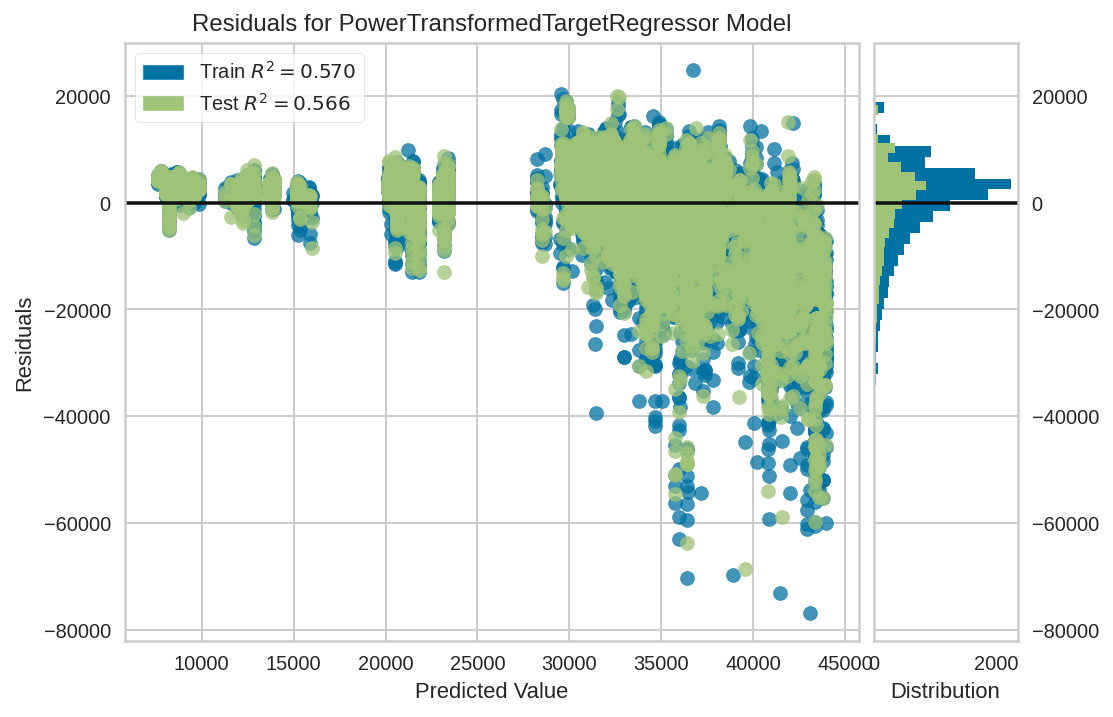

In [ ]:
plot_model(tuned_rf)

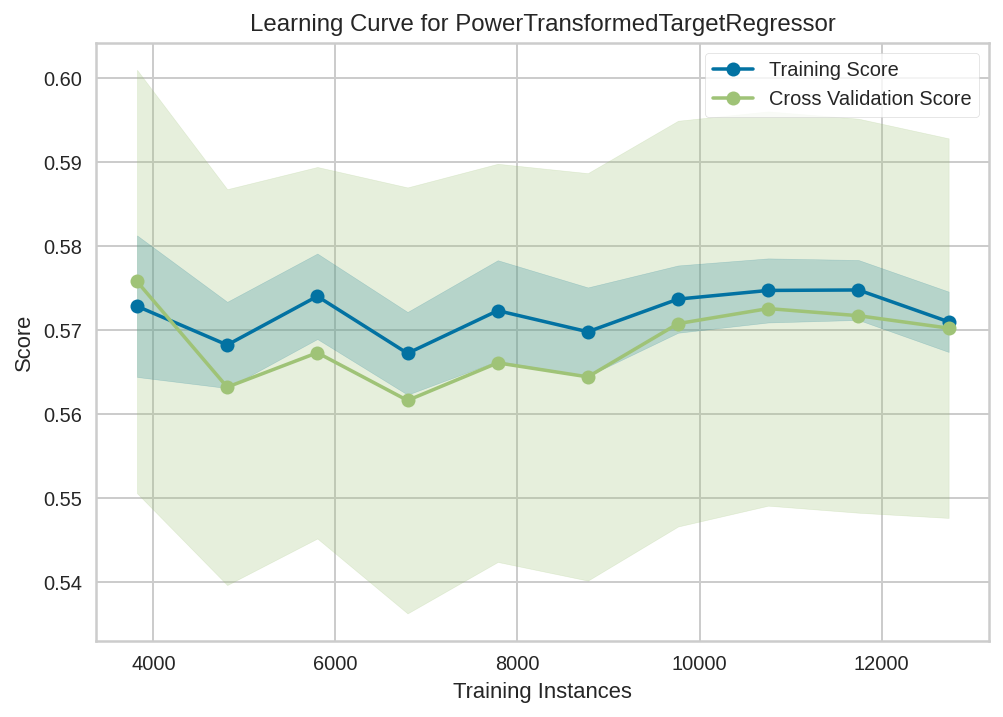

In [ ]:
plot_model(estimator = tuned_rf, plot = 'learning')


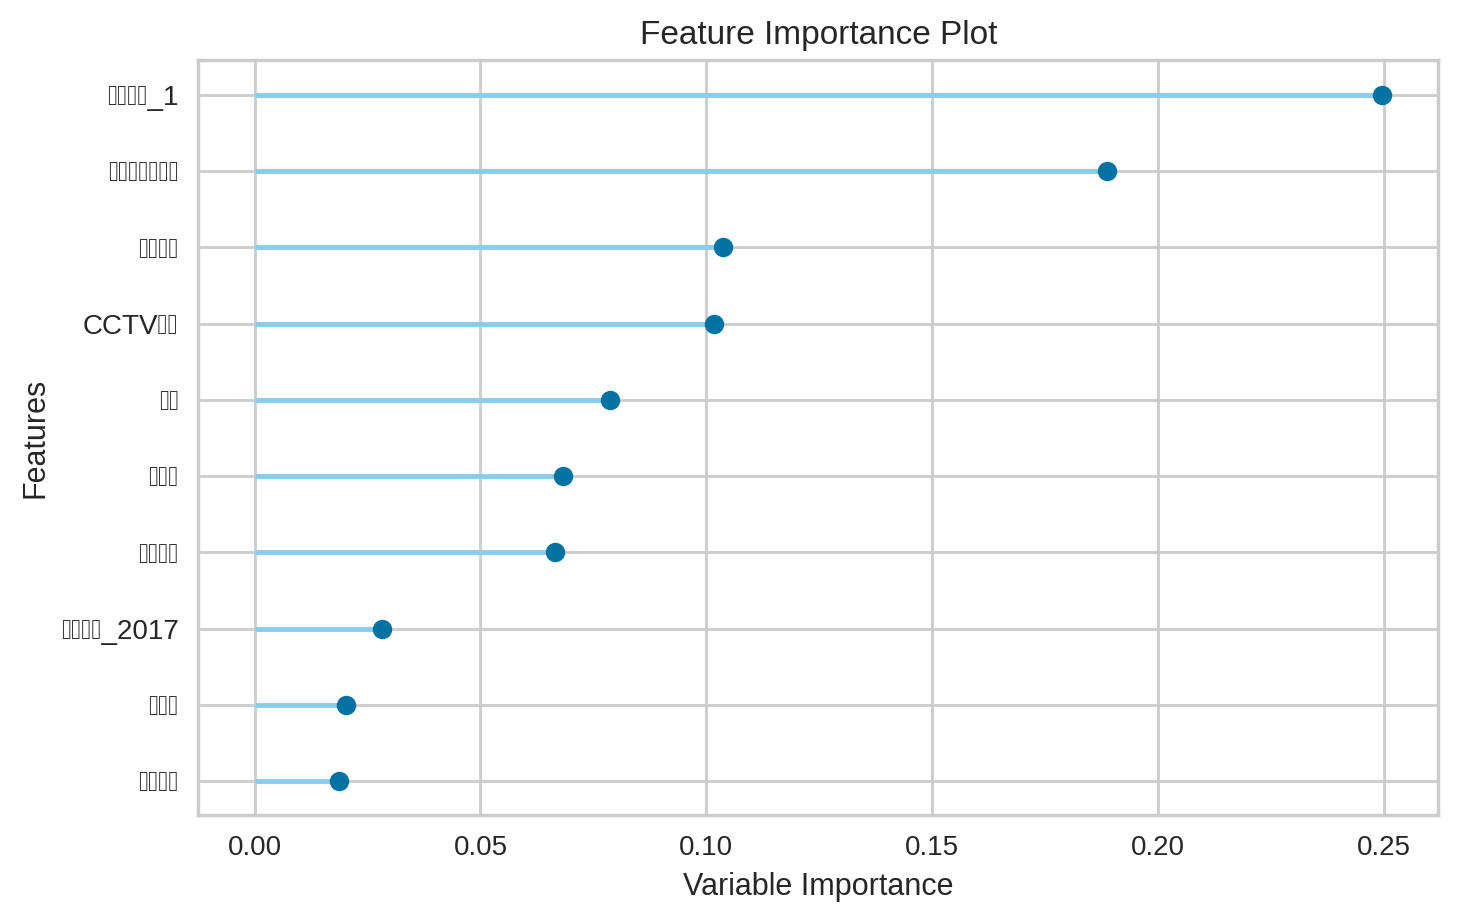

In [ ]:
plot_model(tuned_rf, plot='feature')


In [ ]:
final_rf = finalize_model(tuned_rf)
print(final_rf)